In [ ]:
!pip install setuptools --upgrade

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (51.0.0)


In [ ]:
!pip install -e git+https://github.com/openpiv/openpiv-python@windef_refactoring#egg=openpiv-python

Obtaining openpiv-python from git+https://github.com/openpiv/openpiv-python@windef_refactoring#egg=openpiv-python
  Updating ./src/openpiv-python clone (to revision windef_refactoring)
  Running command git fetch -q --tags
  Running command git reset --hard -q 099e6a5b26679fd2b0f20cebd199b1dcca9fbf0a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Found existing installation: OpenPIV 0.23.0
    Can't uninstall 'OpenPIV'. No files were found to uninstall.
  Running setup.py develop for openpiv


ValueError: ignored

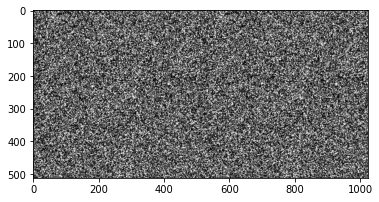

In [ ]:
# %load red_Cell.py
from openpiv import tools, pyprocess, scaling, filters, \
                    validation
import numpy as np
import matplotlib.pyplot as plt

import imageio
from pylab import *
%matplotlib inline

from skimage import img_as_uint

frame_a  = tools.imread('/content/B001_1.tif')  
frame_b  = tools.imread('/content/B001_2.tif')

plt.imshow(np.c_[frame_a,frame_b],cmap=plt.cm.gray)


# Use Cython version: process.pyx

u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32, overlap=8, dt=.1,search_area_size=64, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=32, overlap=8 )

u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )  #PYTHON VALUE ERROR
tools.save(x, y, u, v,sig2noise, mask, 'Y4-S3_Camera000398_a.txt' )


# Use Python version, pyprocess:

u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32, overlap=8, dt=.1,search_area_size=64, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=64, overlap=8, )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

tools.save(x, y, u, v,sig2noise, mask, 'Y4-S3_Camera000398_b.txt' ) #PYTHON VALUE ERROR

# "natural" view without image
fig,ax = plt.subplots(2,1,figsize=(6,12))
ax[0].invert_yaxis()
ax[0].quiver(x,y,u,v)
ax[0].set_title(' Sort of natural view ')

ax[1].quiver(x,y,u,-v)
ax[1].set_title('Quiver with 0,0 origin needs `negative` v for display');
# plt.quiver(x,y,u,v)



tools.display_vector_field('Y4-S3_Camera000398_a.txt',on_img=True,image_name='/content/pic1.bmp',scaling_factor=96.52)



tools.display_vector_field('Y4-S3_Camera000398_a.txt')



tools.display_vector_field('Y4-S3_Camera000398_b.txt')

x,y,u,v, mask = pyprocess.WiDIM(frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=32, overlap_ratio=0.25, coarse_factor=0, dt=0.1, validation_method='mean_velocity', trust_1st_iter=0, validation_iter=0, tolerance=0.7, nb_iter_max=1, sig2noise_method='peak2peak')



tools.save(x, y, u, v, zeros_like(u), 'Y4-S3_Camera000398_widim1.txt' )

x,y,u,v, mask = pyprocess.WiDIM(frame_a.astype(np.int32), frame_b.astype(np.int32), ones_like(frame_a).astype(np.int32), min_window_size=16, overlap_ratio=0.25, coarse_factor=2, dt=0.1, validation_method='mean_velocity', trust_1st_iter=1, validation_iter=2, tolerance=0.7, nb_iter_max=4, sig2noise_method='peak2peak')




tools.save(x, y, u, v, zeros_like(u), 'Y4-S3_Camera000398_widim2.txt' )

tools.display_vector_field('Y4-S3_Camera000398_widim1.txt', widim=True, scale=300, width=0.005)
tools.display_vector_field('Y4-S3_Camera000398_widim2.txt', widim=True, scale=300, width=0.005)
tools.display_vector_field('Y4-S3_Camera000398_a.txt', scale=2, width=0.005,scaling_factor=96.52)
tools.display_vector_field('Y4-S3_Camera000398_b.txt', scale=2, width=0.005,scaling_factor=96.52)









